In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import classification_report



- Survival: Whether a passenger survived or not (0 or 1)

- Pclass: The socio-ecomonic class
        Upper: 1
        Middle: 2
        Lower: 3
- Sex: Gender of the passenger (Male or Female)

- Age: Age in years (Age is fractional if less than 1)
    
- SibSp: Number of siblings / spouses aboard the Titanic
    
- Parch: Number of parents / children aboard the Titanic

- Ticket: Ticket number

- Fare: Passenger fare

- Cabin: Cabin number

- Embarked: Port of Embarkation
        C: Cherbourg
        Q: Queenstown
        S: Southampton
        
        

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


To gain some more insight into the dataframe...

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Convert SEX and EMBARKED from object to category

In [6]:
attribs = ["Sex", "Embarked"]

def convert_cat(df, attrs):
    for col in attrs:
        df[col] = df[col].astype('category')
        
# Use the above function for both train and test sets
convert_cat(train, attribs)
convert_cat(test, attribs)

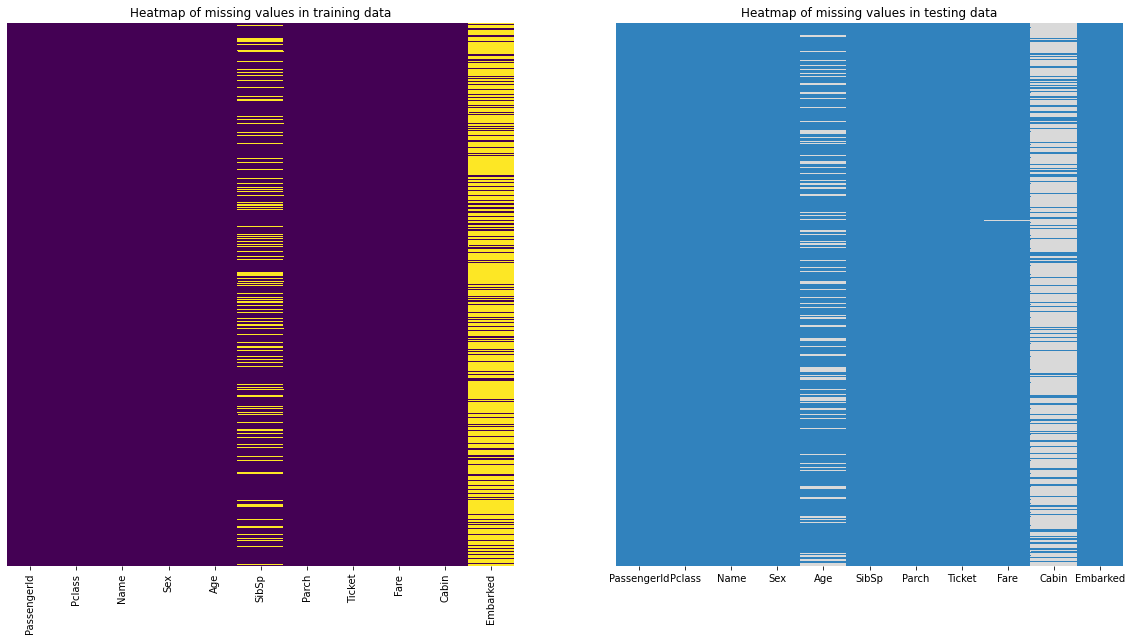

In [7]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,10))
sns.heatmap(ax=axes[0], yticklabels=False, data=train.isnull(), cbar=False, cmap="viridis")
sns.heatmap(ax=axes[1], yticklabels=False, data=test.isnull(), cbar=False, cmap="tab20c")
axes[0].set_title('Heatmap of missing values in training data')
axes[1].set_title('Heatmap of missing values in testing data')
plt.show()

In [8]:
pd.DataFrame(data = [train.isna().sum()/train.shape[0]*100, test.isna().sum()/test.shape[0]*100], index=["Train Null (%)", "Test Null (%)"]).T.style.background_gradient(cmap='tab20c')

,Train Null (%),Test Null (%)
PassengerId,0.000000,0.000000
Survived,0.000000,nan
Pclass,0.000000,0.000000
Name,0.000000,0.000000
Sex,0.000000,0.000000
Age,19.865320,20.574163
SibSp,0.000000,0.000000
Parch,0.000000,0.000000
Ticket,0.000000,0.000000
Fare,0.000000,0.239234


# Data Visualization

In [9]:
sns.set_style("darkgrid")
#sns.set_palette("tab20c")

## Univariate Analysis

#### Survived 

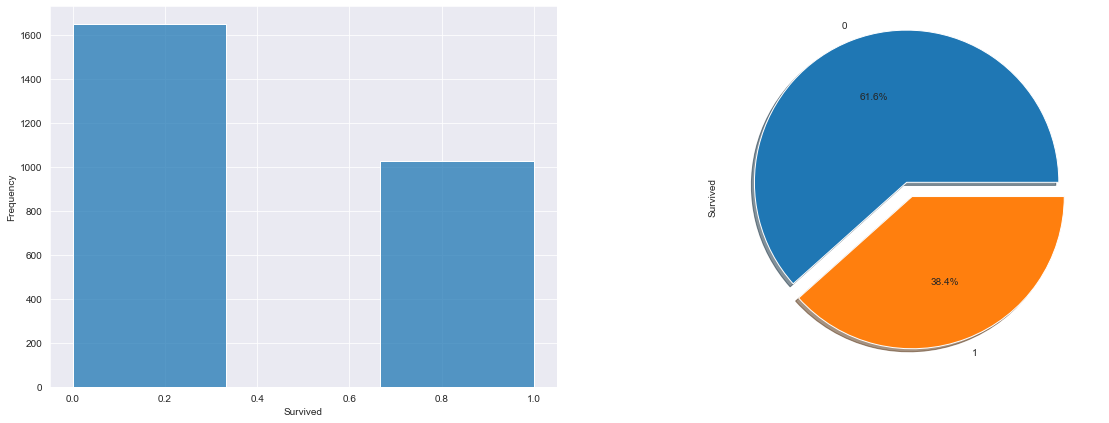

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(data=train, x="Survived", stat="frequency", bins=3, multiple="stack", ax=ax[0])
train["Survived"].value_counts().plot.pie(explode=[0.1, 0], autopct="%1.1f%%", shadow=True, ax=ax[1])

plt.show()

- Only 38.4% of passengers survived the disaster
- 61.6% of passengers did not survive

#### Sex

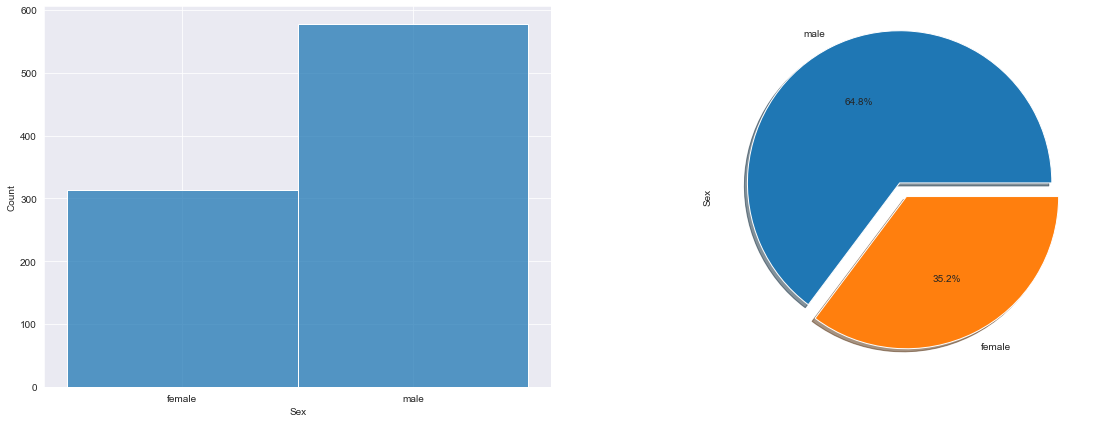

In [11]:
fig1, ax1 = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(data=train, x="Sex", ax=ax1[0])
train["Sex"].value_counts().plot.pie(shadow=True, autopct="%1.1f%%", explode=[0.1, 0], ax=ax1[1])

plt.show()

- Approximately 65% of Male passengers
- 35.2% of passengers are Female

#### Pclass

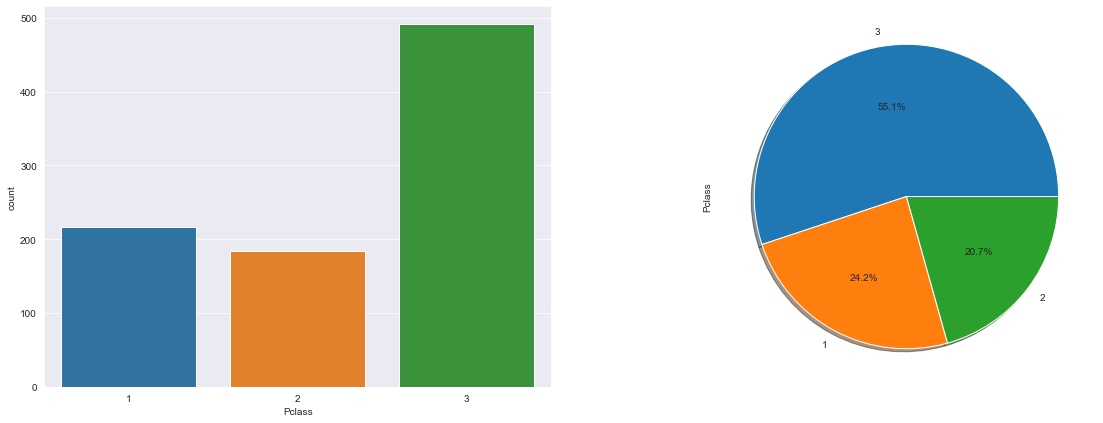

In [12]:
fig2, ax2 = plt.subplots(1, 2, figsize=(20, 7))

sns.countplot(data=train, x="Pclass", ax=ax2[0])
train["Pclass"].value_counts().plot.pie(shadow=True, autopct="%1.1f%%", ax=ax2[1])

plt.show()

#### Age

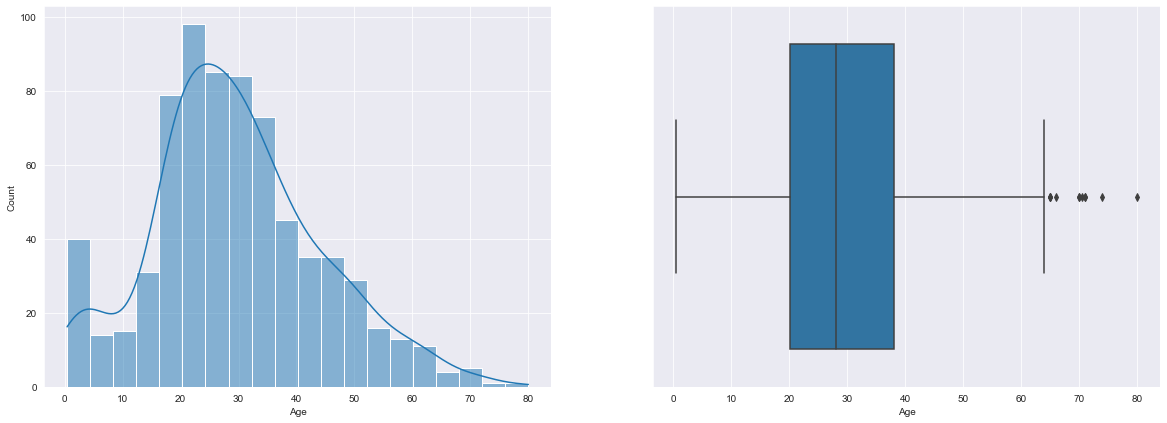

In [13]:
fig3, ax3 = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(data=train, x="Age", ax=ax3[0], kde=True)
sns.boxplot(data=train, x="Age", ax=ax3[1])

plt.show()

#### Fare

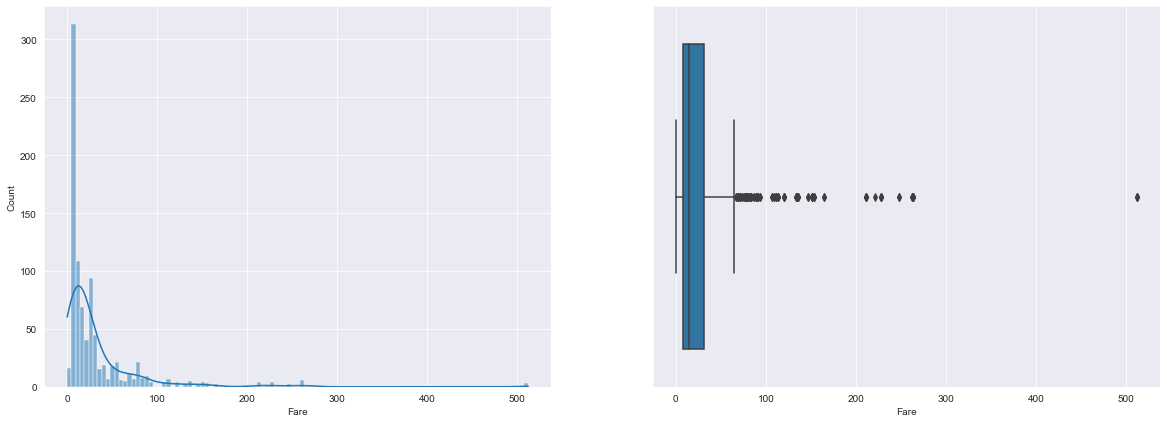

In [14]:
fig4, ax4 = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(data=train, x="Fare", ax=ax4[0], kde=True)
sns.boxplot(data=train, x="Fare", ax=ax4[1])

plt.show()

#### Embarked

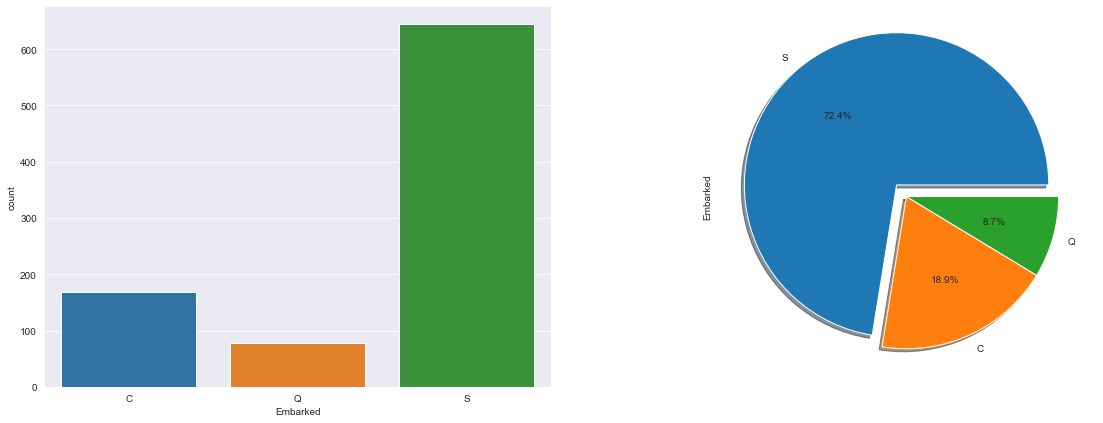

In [15]:
fig5, ax5 = plt.subplots(1, 2, figsize=(20, 7))

sns.countplot(data=train, x="Embarked", ax=ax5[0])
train["Embarked"].value_counts().plot.pie(ax=ax5[1], autopct="%1.1f%%",
                                          explode=(0.1, 0, 0), shadow=True)

plt.show()

#### Parch and SibSp

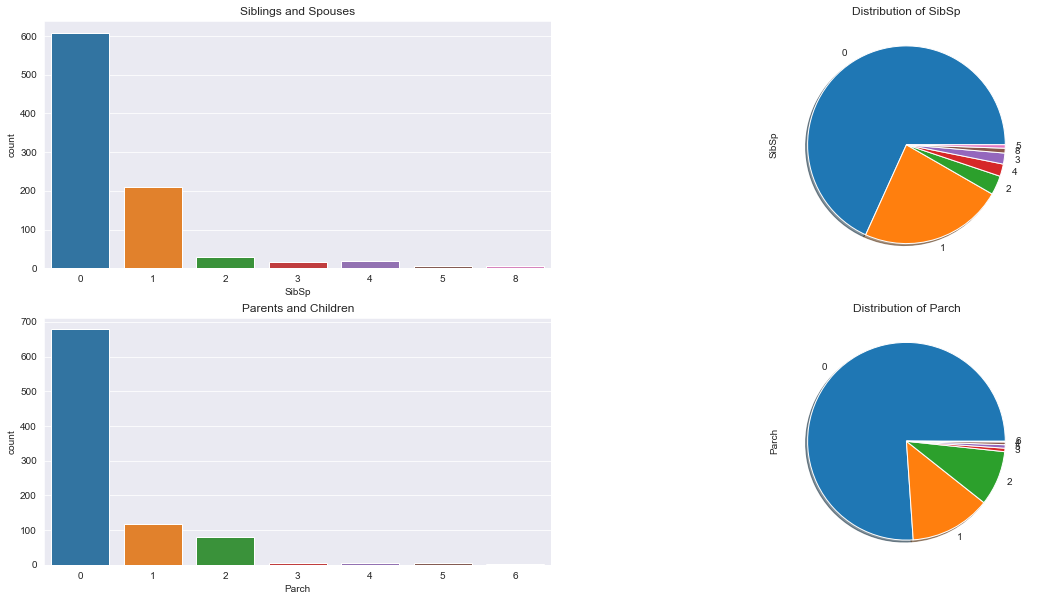

In [16]:
fig6, ax6 = plt.subplots(2, 2, figsize=(20, 10))

# SibSp
sns.countplot(data=train, x="SibSp", ax=ax6[0, 0]).set_title("Siblings and Spouses")
train["SibSp"].value_counts().plot.pie(ax=ax6[0, 1], shadow=True, title="Distribution of SibSp")

# Parch
sns.countplot(data=train, x="Parch", ax=ax6[1, 0]).set_title("Parents and Children")
train["Parch"].value_counts().plot.pie(ax=ax6[1, 1], shadow=True, title="Distribution of Parch")

plt.show()

## Multivariate Analysis

#### Pclass Survival & Sex Survival

Text(0, 0.5, 'Number of passengers')

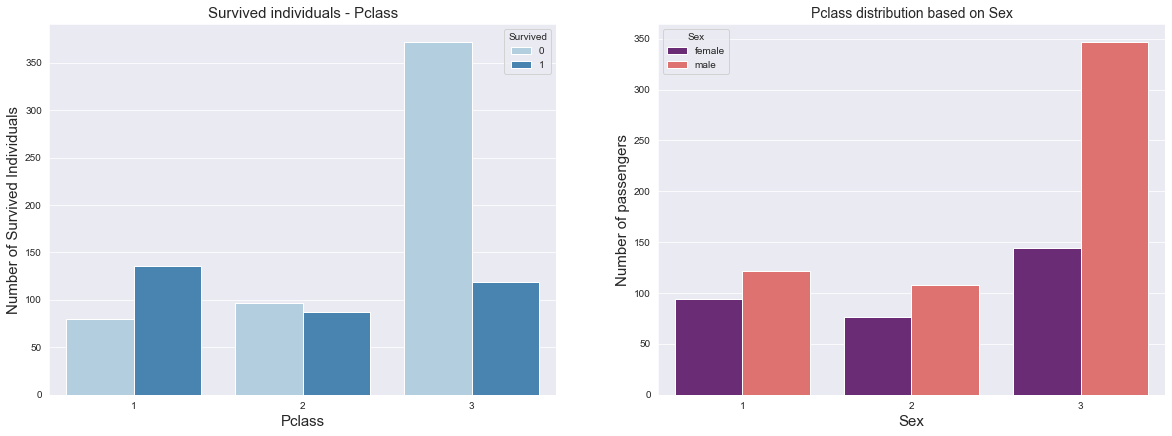

In [17]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(x = train.Pclass, hue = train.Survived, palette="Blues")
plt.title('Survived individuals - Pclass', fontsize=15)
plt.xlabel('Pclass', fontsize=15)
plt.ylabel('Number of Survived Individuals', fontsize=15)

plt.subplot(2,2,2)
sns.countplot(x = train.Pclass, hue = train.Sex, palette="magma")
plt.title('Pclass distribution based on Sex', fontsize=14)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Number of passengers', fontsize=15)

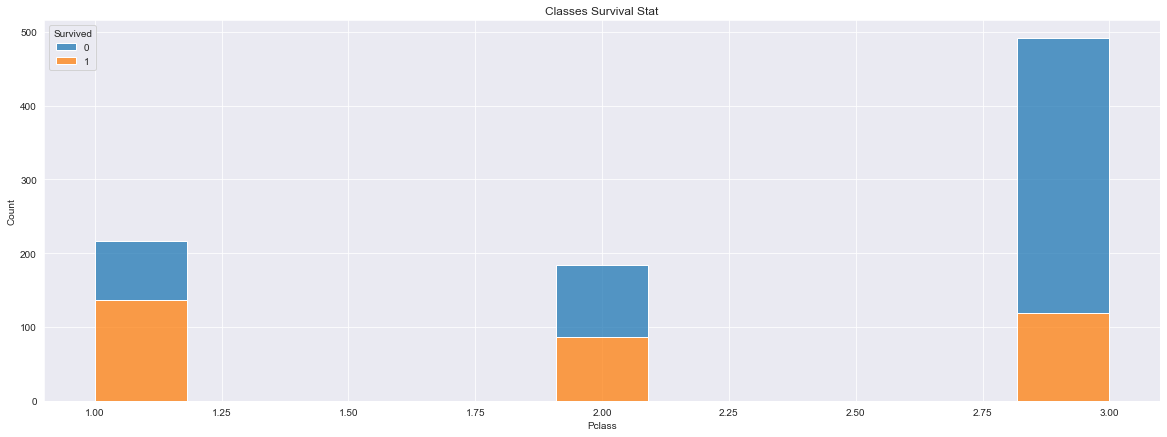

In [18]:
fig, ax = plt.subplots(figsize=(20, 7))

sns.histplot(data=train, x="Pclass", hue="Survived", multiple="stack", ax=ax).set_title("Classes Survival Stat")
plt.show()

In [19]:
sur_upper = train[(train["Survived"] == 1) & (train["Pclass"] == 1)].shape[0]
sur_middle = train[(train["Survived"] == 1) & (train["Pclass"] == 2)].shape[0]
sur_lower = train[(train["Survived"] == 1) & (train["Pclass"] == 3)].shape[0]

print("Upper class survival: ", sur_upper)
print("Middle class survival: ", sur_middle)
print("Lower class survival: ", sur_lower)

Upper class survival:  136
Middle class survival:  87
Lower class survival:  119


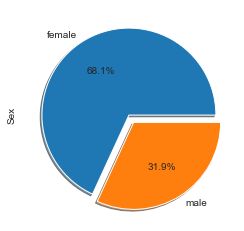

In [20]:
df_m = train[(train["Survived"] == 1) & (train["Sex"] == "male")]
df_f = train[(train["Survived"] == 1) & (train["Sex"] == "female")]

df_sur = pd.concat([df_m, df_f])
df_sur["Sex"].value_counts().plot.pie(explode=[0, 0.1], shadow=True, autopct="%1.1f%%")
plt.show()

#### Age Survival

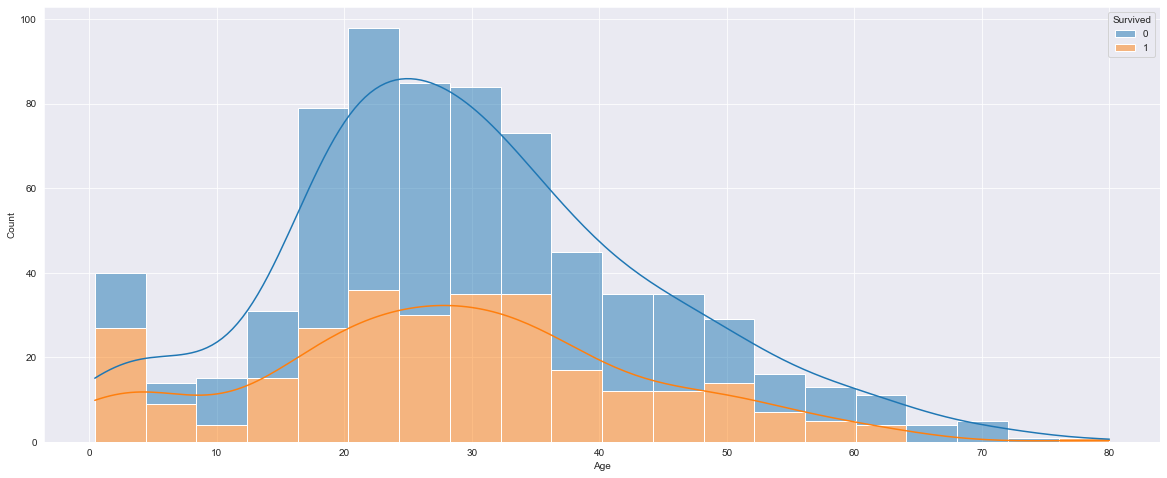

In [21]:
fig7, ax7 = plt.subplots(figsize=(20, 8))

sns.histplot(data=train, x="Age", hue="Survived", multiple="stack", kde=True)
plt.show()

In [22]:
print("Kids survived in age ranges: ")
print("Age 0-4:", train[(train["Age"] < 4) & (train["Survived"] == 1)].shape[0])
print("Age 4-7:", train[(train["Age"] >= 4) & (train["Age"] < 7) & (train["Survived"] == 1)].shape[0])
print("Age 7-10:", train[(train["Age"] >= 7) & (train["Age"] <= 10) & (train["Survived"] == 1)].shape[0])

print("\nKids NOT survived in age ranges: ")
print("Age 0-4:", train[(train["Age"] < 4) & (train["Survived"] == 0)].shape[0])
print("Age 4-7:", train[(train["Age"] >= 4) & (train["Age"] < 7) & (train["Survived"] == 0)].shape[0])
print("Age 7-10:", train[(train["Age"] >= 7) & (train["Age"] <= 10) & (train["Survived"] == 0)].shape[0])

Kids survived in age ranges: 
Age 0-4: 20
Age 4-7: 13
Age 7-10: 5

Kids NOT survived in age ranges: 
Age 0-4: 10
Age 4-7: 4
Age 7-10: 12


#### Fare Survival

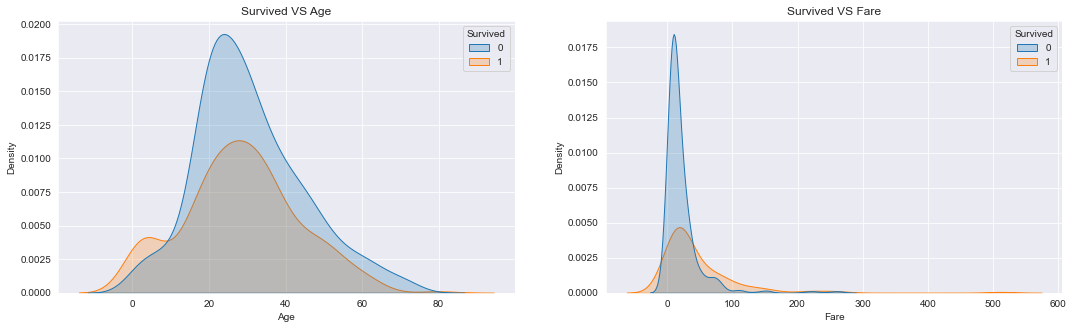

In [23]:
plt.figure(figsize = (18, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(x = "Age", hue= "Survived", data=train, shade = True)
plt.title("Survived VS Age")
plt.subplot(1, 2, 2)
sns.kdeplot(x = "Fare", hue= "Survived", data=train, shade = True)
plt.title("Survived VS Fare")
plt.show()

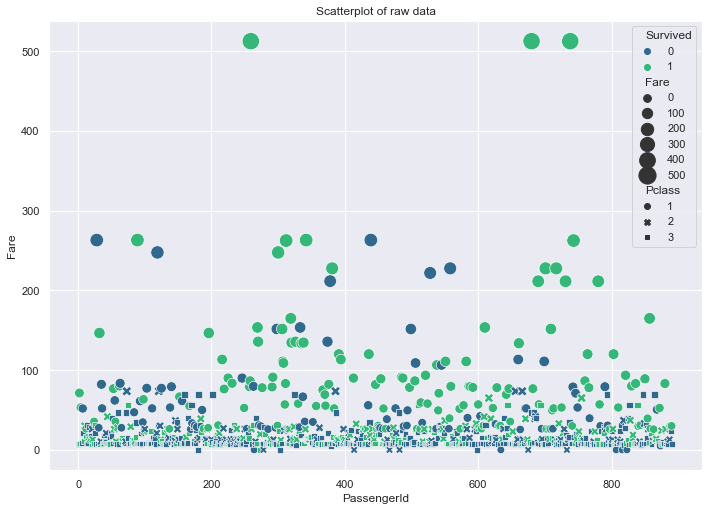

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=train.PassengerId, y=train.Fare, hue=train.Survived, style=train.Pclass, size=train.Fare, sizes=(60,300), palette="viridis")
plt.title('Scatterplot of raw data')
plt.show()

## Correlations

In [25]:
corr = train.corr()

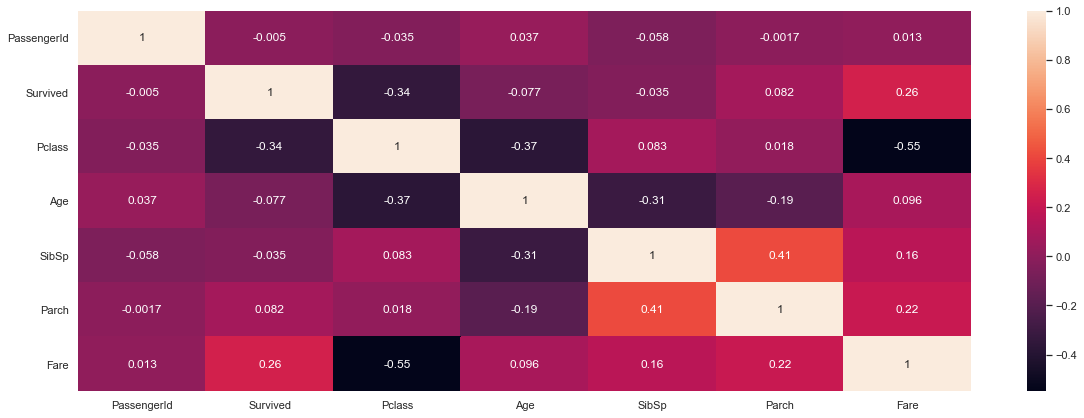

In [26]:
fig, ax = plt.subplots(figsize=(20, 7))
dataplot = sns.heatmap(data=corr, annot=True, ax=ax)
plt.show()

- Pclass has a negative correlation with Survived. Upper class people survived more than the Middle or Lower class people.

- Fare has a positive correlation with Survived. As fare increases the chances of survival slightly increases.

## Prep (Train)

In [27]:
df = train.drop("Survived", axis=1)
labels = train["Survived"].copy()

print(labels)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [28]:
# Custom transformer to sample only the useful attributes
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attrs):
        self.attrs = attrs
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attrs].values

Drop the usless or missing features:

- Ticket
- PassengerId
- Cabin
- Name


In [29]:
num_attrs = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
cat_attrs = ["Sex", "Embarked"]

In [30]:
# Custom transformer to add Parch and SibSp as FamSize
sibsp_ix, parch_ix = 2, 3

class AttribAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        famSize = X[:, sibsp_ix] + X[:, parch_ix] + 1
        return np.c_[X, famSize]

#### Numerical Pipeline

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("selector", DataFrameSelector(num_attrs)),
    ("imputer", SimpleImputer(strategy="median")),
    ("attrib_adder", AttribAdder())
])

#### Categorical Pipeline

In [32]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ("selector", DataFrameSelector(cat_attrs)),
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("label_binarize", OneHotEncoder(sparse=False))
])

Combine Pipelines

In [33]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion([
    ("num", num_pipeline),
    ("cat", cat_pipeline)
])

# Use fit transfrom on full pipeline
titanic_prepared = full_pipeline.fit_transform(df)
titanic_prepared_df = pd.DataFrame(titanic_prepared, columns=[
    "Pclass", "Age", "SibSp", "Parch", "Fare", "FamSize", "Female", "Male", "C", "Q", "S"
])
titanic_prepared_df

,Pclass,Age,SibSp,Parch,Fare,FamSize,Female,Male,C,Q,S
0,3.0,22.0,1.0,0.0,7.2500,2.0,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,2.0,1.0,0.0,1.0,0.0,0.0
2,3.0,26.0,0.0,0.0,7.9250,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,2.0,1.0,0.0,0.0,0.0,1.0
4,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,2.0,27.0,0.0,0.0,13.0000,1.0,0.0,1.0,0.0,0.0,1.0
887,1.0,19.0,0.0,0.0,30.0000,1.0,1.0,0.0,0.0,0.0,1.0
888,3.0,28.0,1.0,2.0,23.4500,4.0,1.0,0.0,0.0,0.0,1.0
889,1.0,26.0,0.0,0.0,30.0000,1.0,0.0,1.0,1.0,0.0,0.0


## Prep (Test)

In [34]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion([
    ("num", num_pipeline),
    ("cat", cat_pipeline)
])

# Use fit transfrom on full pipeline
titanic_test = full_pipeline.fit_transform(test)
titanic_test_df = pd.DataFrame(titanic_test, columns=[
    "Pclass", "Age", "SibSp", "Parch", "Fare", "FamSize", "Female", "Male", "C", "Q", "S"
])
titanic_test_df


,Pclass,Age,SibSp,Parch,Fare,FamSize,Female,Male,C,Q,S
0,3.0,34.5,0.0,0.0,7.8292,1.0,0.0,1.0,0.0,1.0,0.0
1,3.0,47.0,1.0,0.0,7.0000,2.0,1.0,0.0,0.0,0.0,1.0
2,2.0,62.0,0.0,0.0,9.6875,1.0,0.0,1.0,0.0,1.0,0.0
3,3.0,27.0,0.0,0.0,8.6625,1.0,0.0,1.0,0.0,0.0,1.0
4,3.0,22.0,1.0,1.0,12.2875,3.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
413,3.0,27.0,0.0,0.0,8.0500,1.0,0.0,1.0,0.0,0.0,1.0
414,1.0,39.0,0.0,0.0,108.9000,1.0,1.0,0.0,1.0,0.0,0.0
415,3.0,38.5,0.0,0.0,7.2500,1.0,0.0,1.0,0.0,0.0,1.0
416,3.0,27.0,0.0,0.0,8.0500,1.0,0.0,1.0,0.0,0.0,1.0


## Modelling

### Hyperparameter Tuning: Random Forest 

In [35]:
# Parameters of random forest
n_estimators = np.linspace(50, 300, int((300 - 50) / 20), dtype=int)
max_depth = [1, 5, 10, 50, 100, 200, 300]
min_samples_split = [2, 4, 6]
max_features = ["sqrt", "log2"]
bootstrap = [True, False]

distributions = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "max_features": max_features,
    "bootstrap": bootstrap
}

In [36]:
# Randomised search cv
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier()
random_search_cv = RandomizedSearchCV(
    rfc,
    param_distributions=distributions,
    n_iter=30,
    cv=5,
    n_jobs=4
)

search = random_search_cv.fit(titanic_prepared, labels)

In [37]:
cvres = search.cv_results_

for score, params, rank in zip(cvres["mean_test_score"], cvres["params"], cvres["rank_test_score"]):
    print(score, params, rank)

0.8058376749733224 {'n_estimators': 209, 'min_samples_split': 4, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False} 26
0.8249199673592367 {'n_estimators': 186, 'min_samples_split': 4, 'max_features': 'sqrt', 'max_depth': 300, 'bootstrap': True} 3
0.8058439520431863 {'n_estimators': 186, 'min_samples_split': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False} 25
0.8114619295712762 {'n_estimators': 300, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False} 21
0.8103634423451134 {'n_estimators': 163, 'min_samples_split': 6, 'max_features': 'sqrt', 'max_depth': 300, 'bootstrap': False} 22
0.8249325214989642 {'n_estimators': 95, 'min_samples_split': 6, 'max_features': 'log2', 'max_depth': 100, 'bootstrap': True} 2
0.8215366267026551 {'n_estimators': 231, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': True} 9
0.8170673529596384 {'n_estimators': 72, 'min_samples_split': 4, 'max_features': 'log2', 'max_depth': 

              precision    recall  f1-score   support

           0    0.83447   0.89071   0.86167       549
           1    0.80328   0.71637   0.75734       342

    accuracy                        0.82379       891
   macro avg    0.81887   0.80354   0.80951       891
weighted avg    0.82250   0.82379   0.82163       891



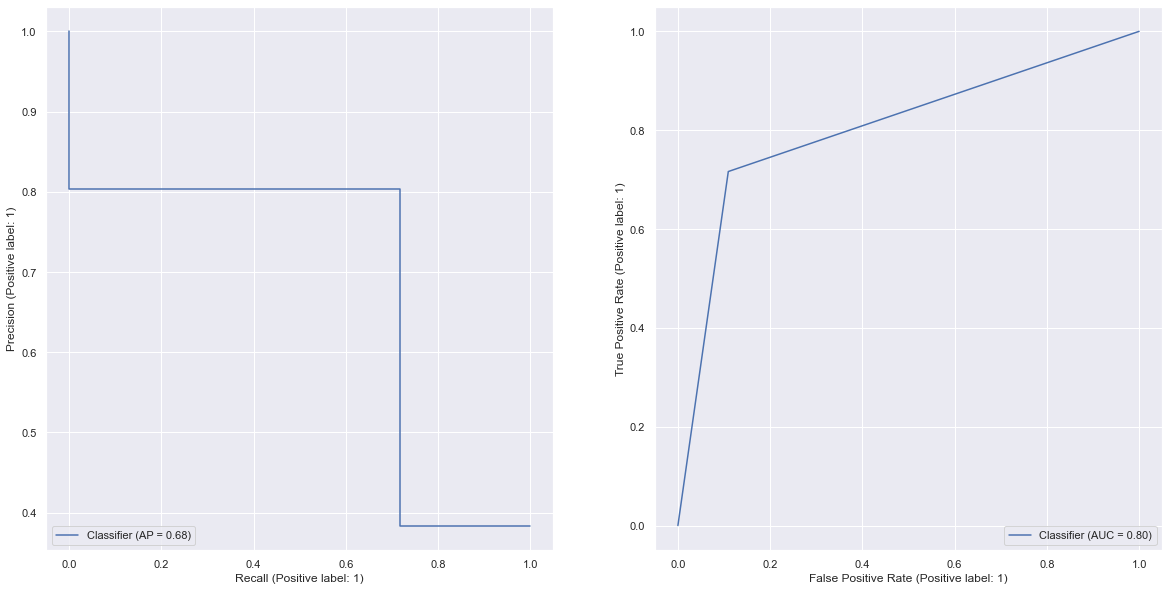

In [38]:
rfc_finetuned = search.best_estimator_
best_preds = cross_val_predict(rfc_finetuned, titanic_prepared, labels, cv=5)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
PrecisionRecallDisplay.from_predictions(labels, best_preds, ax=ax[0])
RocCurveDisplay.from_predictions(labels, best_preds, ax=ax[1])

print(classification_report(labels, best_preds, digits=5))
plt.show()

In [39]:
prediction_rfc = rfc_finetuned.predict(titanic_test_df)
prediction_rfc

C:\Users\16095\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [41]:
submission_rfc = pd.DataFrame({"PassengerId": test["PassengerId"],
                            "Survived": prediction_rfc})
submission_rfc.to_csv('submission_rfc.csv', index=False)

In [42]:
prediction_rfc = pd.read_csv('submission_rfc.csv')

<AxesSubplot:xlabel='Survived', ylabel='count'>

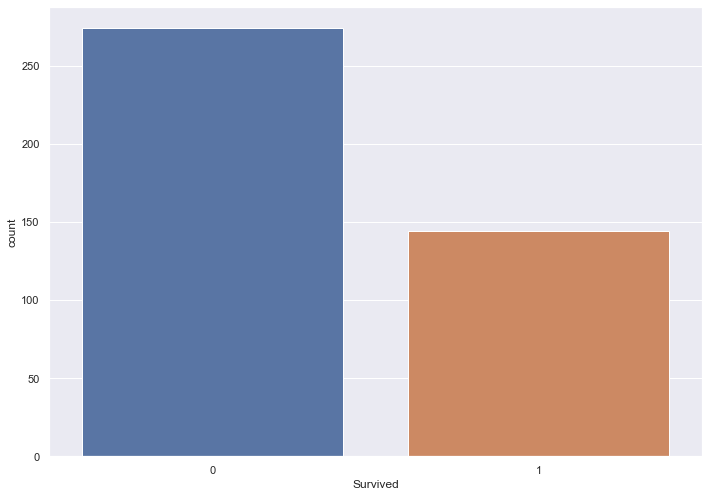

In [43]:
#Visualizing predicted values
sns.countplot(x='Survived', data=prediction_rfc)

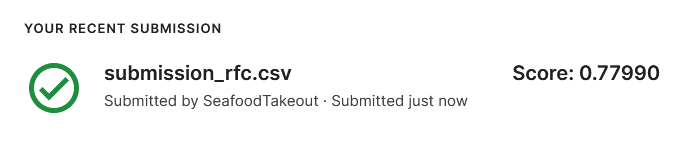

In [54]:
from IPython.display import Image
Image(filename='submission_rfc.png') 

### Hyperparameter Tuning: Gradient Boost 

In [44]:
# Parameters of gradient boost
n_estimators = np.linspace(50, 300, int((300 - 50) / 20), dtype=int)
max_depth = [1, 5, 10, 50, 100, 200, 300]
min_samples_split = [2, 4, 6]
max_features = ["sqrt", "log2"]

distributions = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "max_features": max_features
}

In [45]:
# Randomised search cv
from sklearn.model_selection import RandomizedSearchCV

gbc = GradientBoostingClassifier()
random_search_cv = RandomizedSearchCV(
    gbc,
    param_distributions=distributions,
    n_iter=30,
    cv=5,
    n_jobs=4
)

search = random_search_cv.fit(titanic_prepared, labels)

In [46]:
cvres = search.cv_results_

for score, params, rank in zip(cvres["mean_test_score"], cvres["params"], cvres["rank_test_score"]):
    print(score, params, rank)

0.8013746783001695 {'n_estimators': 254, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 10} 17
0.8069801016885318 {'n_estimators': 209, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 300} 11
0.8002322515849603 {'n_estimators': 50, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 100} 21
0.8002385286548239 {'n_estimators': 277, 'min_samples_split': 4, 'max_features': 'sqrt', 'max_depth': 300} 20
0.8092021844203128 {'n_estimators': 118, 'min_samples_split': 6, 'max_features': 'sqrt', 'max_depth': 1} 10
0.7980164459230432 {'n_estimators': 118, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 100} 25
0.813709120582512 {'n_estimators': 231, 'min_samples_split': 4, 'max_features': 'sqrt', 'max_depth': 1} 5
0.8103320569957944 {'n_estimators': 95, 'min_samples_split': 6, 'max_features': 'sqrt', 'max_depth': 1} 8
0.8305504990270542 {'n_estimators': 186, 'min_samples_split': 6, 'max_features': 'log2', 'max_depth': 5} 1
0.7968865733475614 {'n_es

              precision    recall  f1-score   support

           0    0.84441   0.87978   0.86173       549
           1    0.79310   0.73977   0.76551       342

    accuracy                        0.82604       891
   macro avg    0.81875   0.80977   0.81362       891
weighted avg    0.82471   0.82604   0.82480       891



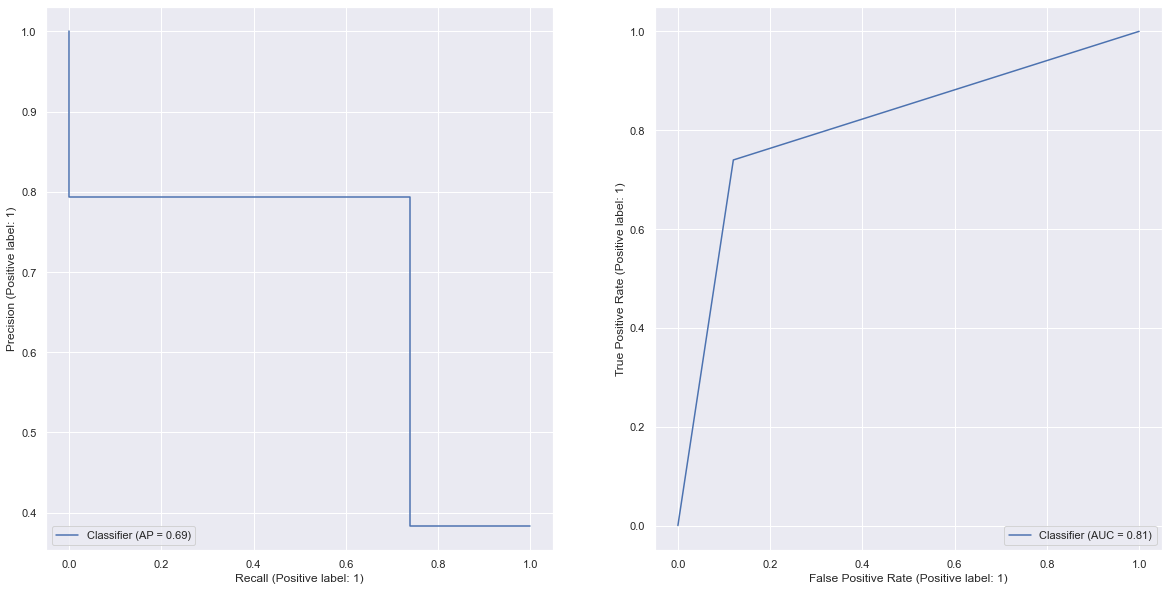

In [47]:
gbc_finetuned = search.best_estimator_
best_preds = cross_val_predict(gbc_finetuned, titanic_prepared, labels, cv=5)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
PrecisionRecallDisplay.from_predictions(labels, best_preds, ax=ax[0])
RocCurveDisplay.from_predictions(labels, best_preds, ax=ax[1])

print(classification_report(labels, best_preds, digits=5))
plt.show()

In [50]:
prediction_gbc = gbc_finetuned.predict(titanic_test_df)
prediction_gbc

C:\Users\16095\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [51]:
submission_gbc = pd.DataFrame({"PassengerId": test["PassengerId"],
                            "Survived": prediction_gbc})
submission_gbc.to_csv('submission_gbc.csv', index=False)

In [52]:
prediction_gbc = pd.read_csv('submission_gbc.csv')

<AxesSubplot:xlabel='Survived', ylabel='count'>

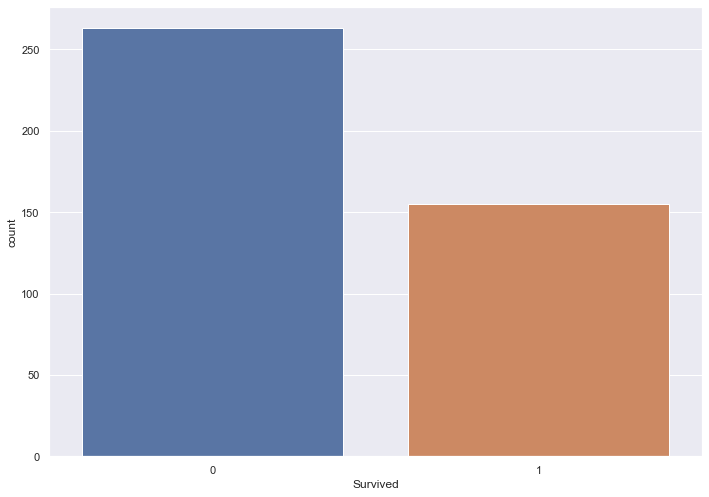

In [53]:
#Visualizing predicted values
sns.countplot(x='Survived', data=prediction_gbc)

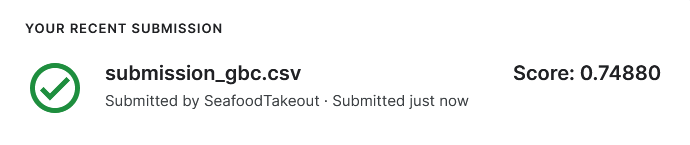

In [55]:
from IPython.display import Image
Image(filename='submission_gbc.png') 

### Conclusion

In the process of completing this assignment, I ran into multiple roadblocks. I attempted to use several models for Gradient Boosting including xgboost. However, the sklearn was the only one I could get to run properly. I also experienced several problems trying to utilize the Random Forest Regressor. I restarted my data prep multiple times to try to resolve some of the errors I was getting when using this model estimator, but I could find no feasible way around them. Despite the difficulties, I think the hyperparameter tuning method used here feels streamlined and works well. 
Based on the metrics above, it appears these models performed similarly (both with an accuracy score of about .82). However, based on the Kaggle score, the Random Forest model performed better. I'm still curious about the performance of other gradient boost estimators and how they may perform differently if I could successfully utilize them. 